In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import json
import os

In [2]:
def plot_execs(key = "pops"):    
# Your JSON data
    combined_data = []
    path = "results/hyper/" + key
    files = os.listdir(path)
    n=0
    for file in files:
        if os.path.isdir(path+"/"+file):
            continue
        with open(path + "/" + file, "r") as f:
            n+=1
            json_data = json.loads(f.read())
            combined_data.append(json_data)

    items_min = [item["min_fit"] for item in combined_data]
    items_max = [item["max_fit"] for item in combined_data]
    solvers = [item["solver"] for item in combined_data]

    unique_solutions = {item["solver"][0] : item["no_unique_solutions"] for item in combined_data}

    # Extracting data
    #execution_numbers = list(range(1, len(json_data["avg_fit"]) + 1))
    avg_fit = json_data["avg_fit"]
    min_fit = json_data["min_fit"]
    max_fit = json_data["max_fit"]
    #print(unique_solutions)
    #fig, ax = plt.subplots(figsize=(10, 6))
    #plt.plot(items_min)


    # Plotting the data
    cmap = plt.colormaps["tab20"]
    colors = cmap.colors
    fig = plt.figure(figsize=(10, 6))
    plt.axhline(y=179, color='r', linestyle='--', label='Target')
    #ax = fig.add_subplot(111)



    for i in range(len(combined_data)):
        plt.plot(list(range(1, len(items_min[i])+1)), items_min[i], label=solvers[i][0], color=colors[i*2])
        #plt.plot(list(range(1, len(items_max[i])+1)), items_max[i], label=solvers[i][0], color=colors[(i*2)+1])
        
        last_min_point = (len(items_min[i]), items_min[i][-1])
        plt.text(*last_min_point, f"{last_min_point[1]:.2f}", color=colors[i * 2], ha="left", va="bottom")

    #plt.plot(execution_numbers, avg_fit, label="Average Fitness", marker='o')
    #plt.plot(execution_numbers, min_fit, label="Minimum Fitness", marker='o')
    #plt.plot(execution_numbers, max_fit, label="Maximum Fitness", marker='o')


    # Adding labels and title
    plt.xlabel("Execution Number")
    plt.ylabel("Fitness")
    plt.title("Fitness Over Executions")
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.grid(True)
    #plt.title(f"{json_data['solver']}")

    # Show the plot
    plt.show()
plot_execs("pops") # pops, gens, mut, sel

FileNotFoundError: [Errno 2] No such file or directory: 'results/hyper/pops'

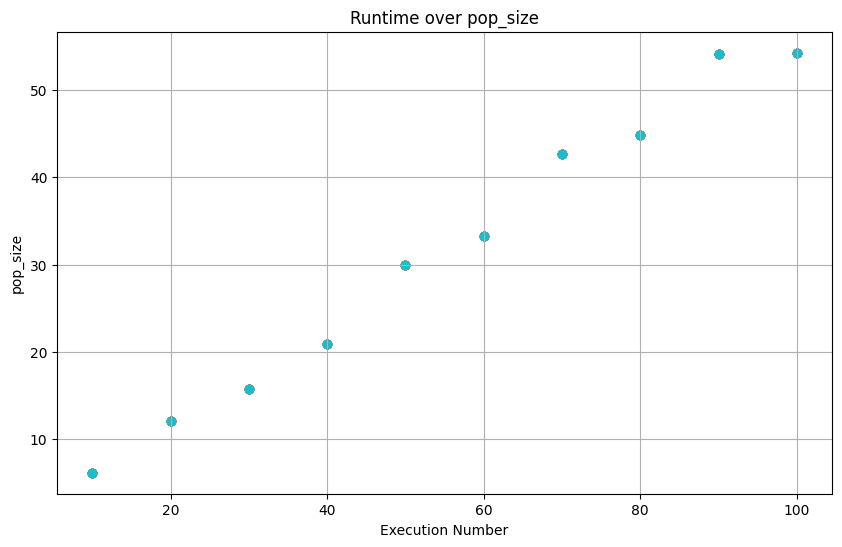

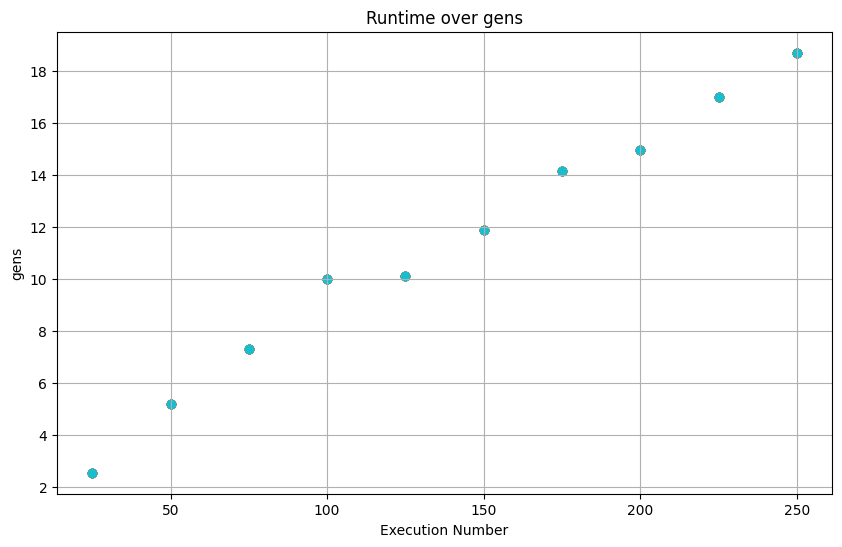

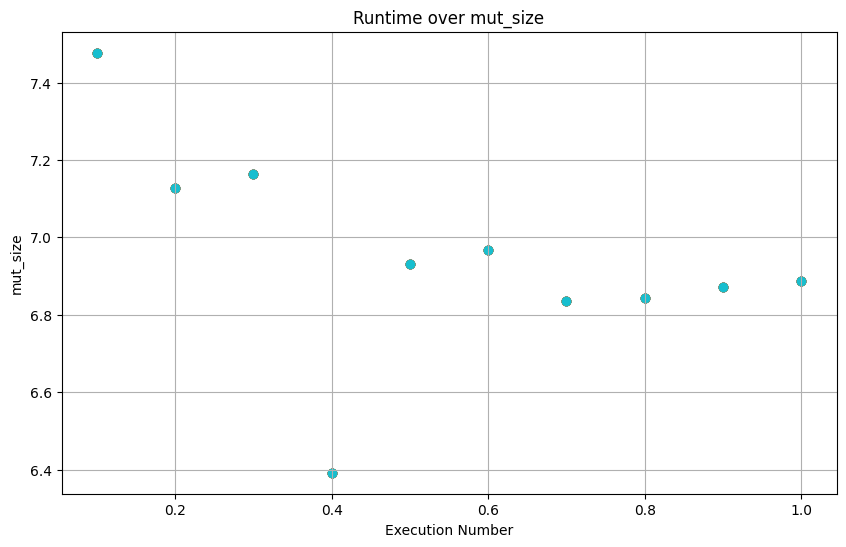

In [52]:
def plot_runtime(key, variable="pop_size", path ="results/hyper/pops"):   
# Your JSON data
    combined_data = []
    path = path
    variable = variable
    files = os.listdir(path)
    n=0
    for file in files:
        if os.path.isdir(path+"/"+file):
            continue
        with open(path + "/" + file, "r") as f:
            n+=1
            json_data = json.loads(f.read())
            combined_data.append(json_data)

    items_min = [item["min_fit"] for item in combined_data]
    items_max = [item["max_fit"] for item in combined_data]
    solvers = [item["solver"] for item in combined_data]
    times = [item["time"][0] for item in combined_data]
    variables = [item[variable] for item in combined_data]

    unique_solutions = {item["solver"][0] : item["no_unique_solutions"] for item in combined_data}

    # Plotting the data
    cmap = plt.colormaps["tab20"]
    colors = cmap.colors
    fig = plt.figure(figsize=(10, 6))
    #ax = fig.add_subplot(111)



    for i in range(len(combined_data)):
        plt.scatter(variables, times, label=solvers[i][0], color=colors[i*2])
        
        
    # Adding labels and title
    plt.xlabel("Execution Number")
    plt.ylabel(variable)
    plt.title(f"Runtime over {variable}")
    #plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.grid(True)
    #plt.title(f"{json_data['solver']}")

    # Show the plot
    plt.show()
plot_runtime("pops", "pop_size", path ="results/hyper/pops") # pops, gens, mut, sel
plot_runtime("gens", "gens", path ="results/hyper/gens")
plot_runtime("mut", "mut_size", path ="results/hyper/mut")



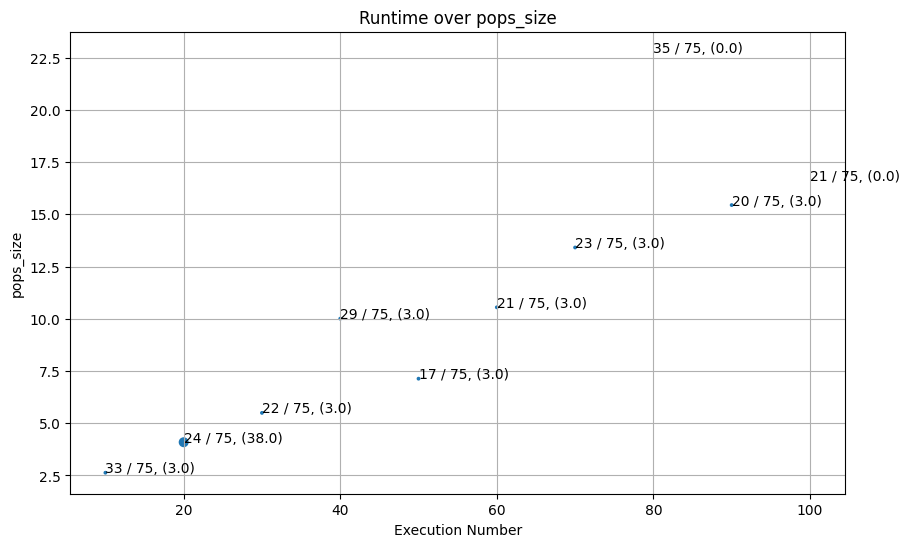

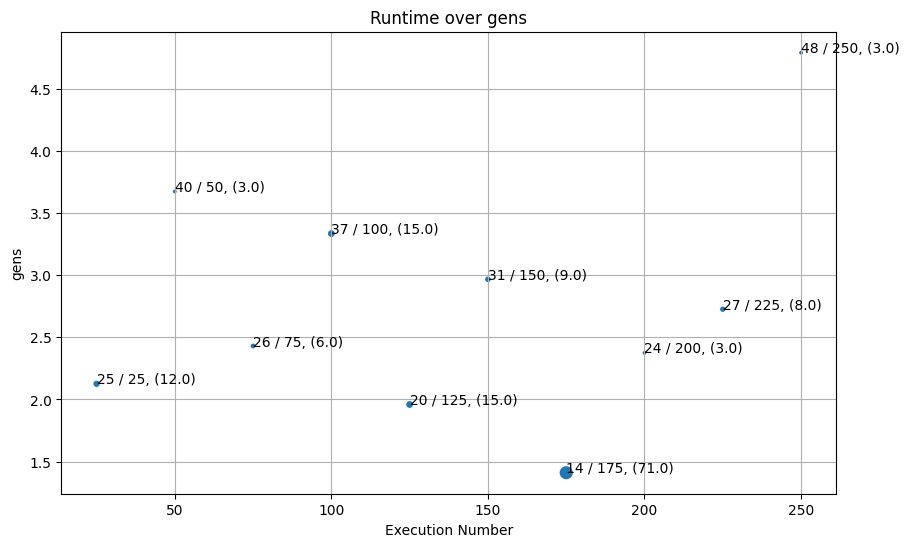

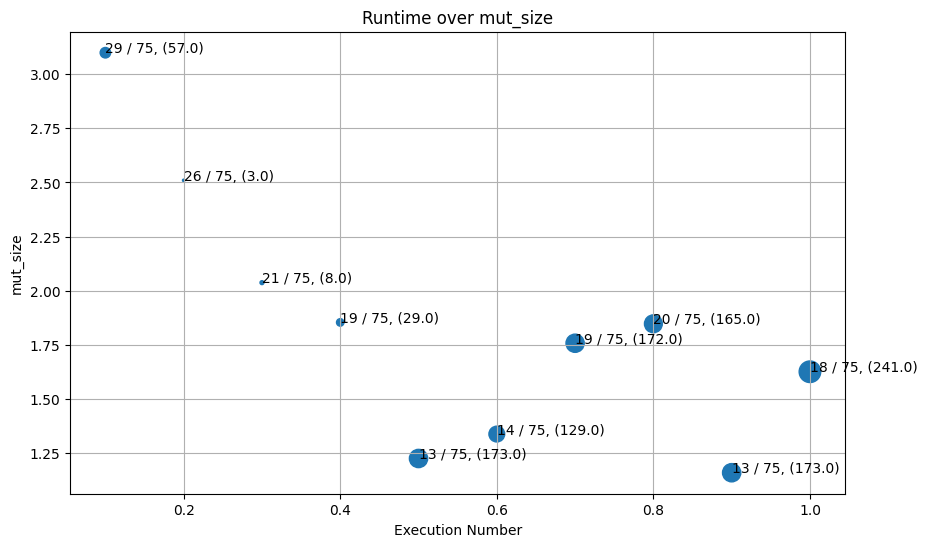

In [68]:
def plot_runtime_abandon(key, variable="pops_size", path ="results/hyper/pops"):   
# Your JSON data
    combined_data = []
    path = path
    variable = variable
    overall_best = 288
    files = os.listdir(path)
    n=0
    for file in files:
        if os.path.isdir(path+"/"+file):
            continue
        with open(path + "/" + file, "r") as f:
            n+=1
            json_data = json.loads(f.read())
            combined_data.append(json_data)

    items_min = [item["min_fit"] for item in combined_data]
    items_max = [item["max_fit"] for item in combined_data]
    solvers = [item["solver"] for item in combined_data]
    times = [item["time"][0] for item in combined_data]
    variables = [item[variable] for item in combined_data]
    generations =[item["generations"] for item in combined_data]
    size = [item["best"][0]-overall_best for item in combined_data]

    unique_solutions = {item["solver"][0] : item["no_unique_solutions"] for item in combined_data}

    # Plotting the data
    cmap = plt.colormaps["tab20"]
    colors = cmap.colors
    fig = plt.figure(figsize=(10, 6))
    #ax = fig.add_subplot(111)


    plt.scatter(variables, times, s=size)
    for i in range(len(variables)): 
        txt = f"{len(items_min[i])} / {generations[i]}, ({size[i]})"
        plt.text(variables[i], times[i], txt )
        
        
    # Adding labels and title
    plt.xlabel("Execution Number")
    plt.ylabel(variable)
    plt.title(f"Runtime over {variable}")
    #plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.grid(True)
    #plt.title(f"{json_data['solver']}")

    # Show the plot
    plt.show()
plot_runtime_abandon("pops", "pops_size", path="results/hyper/pops/abandon") # pops, gens, mut, sel
plot_runtime_abandon("gens", "gens", path="results/hyper/gens/abandon")
plot_runtime_abandon("mut", "mut_size", path="results/hyper/mut/abandon")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


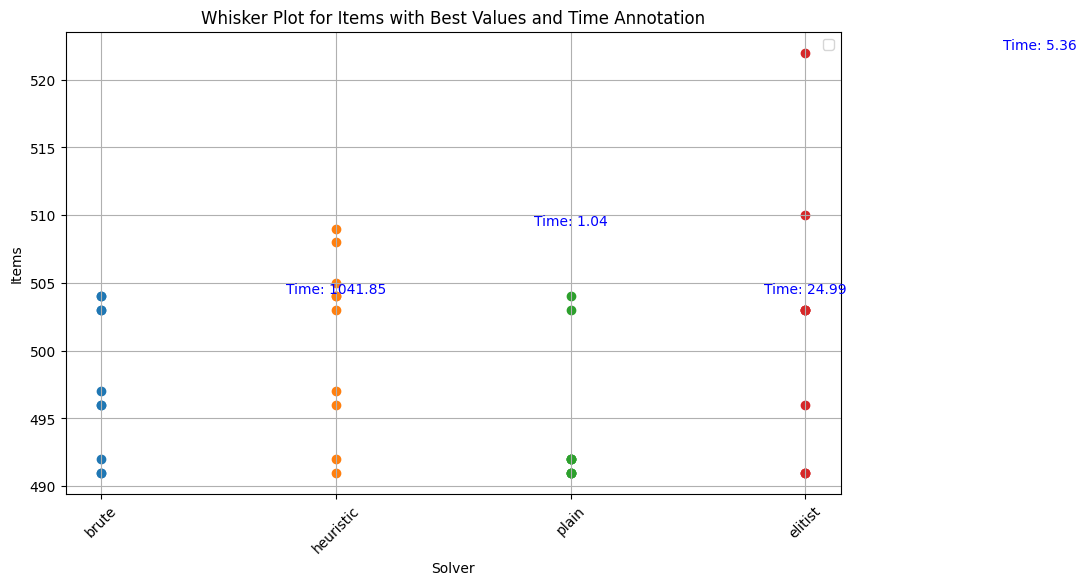

In [3]:
import matplotlib.pyplot as plt
import json
import os

# Load JSON data from dir_path folder
dir_path = "results/experiments/heterogen/"
combined_data = []
gen_data = []
for file in os.listdir(dir_path):
    if os.path.isdir(dir_path + file):
        continue

    with open(dir_path+file, "r") as f:
        if file[:3] == "gen":
            gen_data.append(json.loads(f.read()))
        else:    
            combined_data.append(json.loads(f.read()))

# Extracting data for plotting
solvers = [item["solver"][0] for item in combined_data]
times = [item["time"][0] for item in combined_data]
items = [item["items"][0] for item in combined_data]
best_values = [item["best"][0] for item in combined_data]

# Extracting Gen Data:
solvers_g = [item["solver"][0] for item in  gen_data]
times_g = [sum(item["times"])/len(item["times"]) for item in gen_data]
items_g = [item["bests"] for item in gen_data]
best_values_g = [min(item["bests"]) for item in gen_data]

for i in range(len(items_g)):
    items.append(items_g[i])
times += times_g
lables =solvers + solvers_g

best_values += (best_values_g)
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
#box = ax.boxplot(items, labels=lables, vert=True, patch_artist=True)

# Plotting
for i, y_values in enumerate(items):
    ax.scatter([i]*len(y_values), y_values)

# Highlight the best values with a red line
#ax.plot(solvers, best_values, color='red', marker='o', linestyle='None', label='Best')

# Adjust x-values for aligning with the boxplot positions
x_values_best = [i + 1 for i in range(len(lables))]

# Highlight the best values with a red line
#ax.plot(x_values_best, best_values, color='red', marker='o', linestyle='None', label='Best')

# Annotate the time on top of each whisker
for i, (solver, time) in enumerate(zip(lables, times)):
    ax.text(i + 1, max(items[i]), f'Time: {time:.2f}', ha='center', va='bottom', color='blue')

# Adding labels and title
plt.xlabel("Solver")
plt.ylabel("Items")
plt.xticks(range(len(lables)), lables, rotation=45)
plt.title("Whisker Plot for Items with Best Values and Time Annotation")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
